Анализ датасета криптовалюты Ethereum


In [1]:
# main.py
import pandas as pd
import numpy as np
import kagglehub
import sys
sys.path.append('/content/sample_data')
import loader_dataset as loader
import mdl_analysis as analysis
import mdl_preprocessing as preproc
import mdl_visualization as visual

# Загрузка датасета с сайта https://www.kaggle.com/
file_path = "/content/sample_data/coin_Ethereum.csv"
print(file_path)

dataset = loader.load_csv_file(file_path)

/content/sample_data/coin_Ethereum.csv
Данные успешно загружены.


In [2]:
# Вывод статистической информации
analysis.statistic_data(dataset)

Первые 5 записей:
    SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.879810  0.629191  0.706136   
2    3  Ethereum    ETH  2015-08-10 23:59:59  0.729854  0.636546  0.713989   
3    4  Ethereum    ETH  2015-08-11 23:59:59  1.131410  0.663235  0.708087   
4    5  Ethereum    ETH  2015-08-12 23:59:59  1.289940  0.883608  1.058750   

      Close     Volume     Marketcap  
0  0.753325   674188.0  4.548689e+07  
1  0.701897   532170.0  4.239957e+07  
2  0.708448   405283.0  4.281836e+07  
3  1.067860  1463100.0  6.456929e+07  
4  1.217440  2150620.0  7.364501e+07  

Последние 5 записей:
        SNo      Name Symbol                 Date         High          Low  \
2155  2156  Ethereum    ETH  2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH  2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum 

In [3]:
# Предобработка датасета
columns = ['Name', 'Symbol']
dataset = preproc.drop_columns(dataset, columns)
dataset = preproc.transform_date(dataset, 'Date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2160 non-null   int64         
 1   Date       2160 non-null   datetime64[ns]
 2   High       2160 non-null   float64       
 3   Low        2160 non-null   float64       
 4   Open       2160 non-null   float64       
 5   Close      2160 non-null   float64       
 6   Volume     2160 non-null   float64       
 7   Marketcap  2160 non-null   float64       
 8   date_int   2160 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 152.0 KB
None


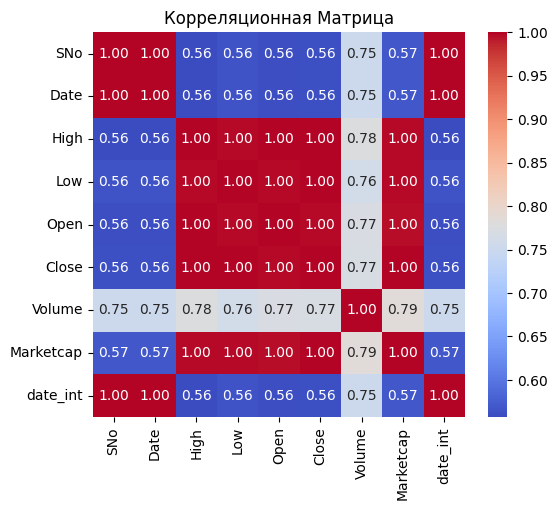

График сохранен: sample_data/outputs/correlation_matrix.png


In [4]:
# Матрица корреляций
analysis.corr_data(dataset)

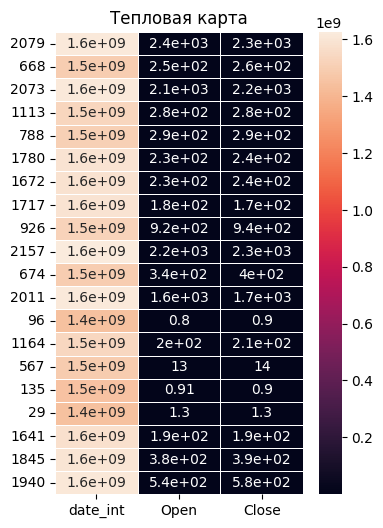

График сохранен: sample_data/outputs/heat_map.png


In [5]:
# Визуализация тепловой карты
dataset_heat = dataset[['date_int', 'Open', 'Close']]
analysis.heat_data(dataset_heat, 20)

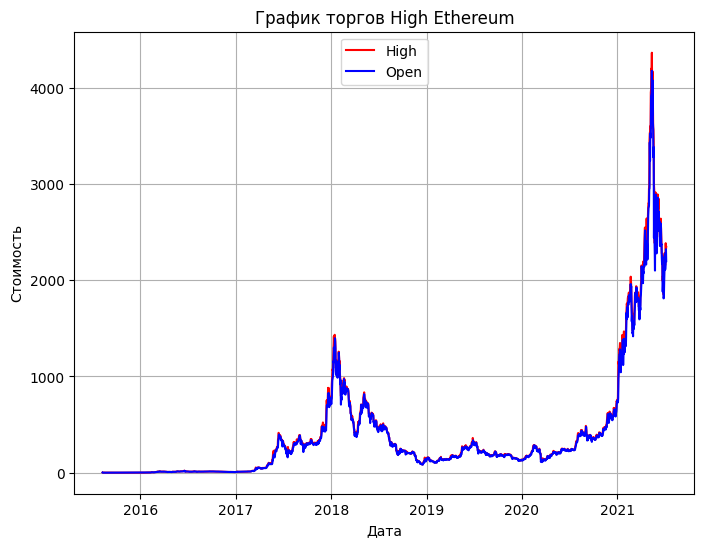

График сохранен: sample_data/outputs/trading_High.png


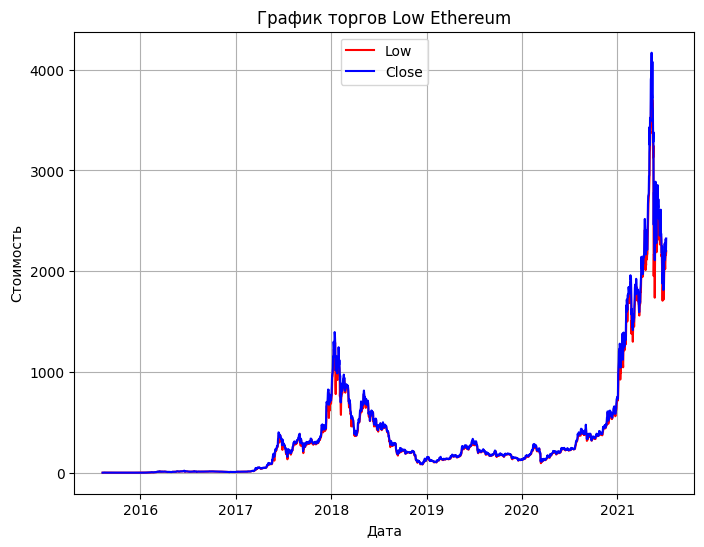

График сохранен: sample_data/outputs/trading_Low.png


In [6]:
# Графики торгов роста
visual.visual_trading(dataset, 'Open', 'High')
visual.visual_trading(dataset, 'Close', 'Low')

In [7]:
# Выделяем временной интервал
start_date = "2017-01-01"
end_date = "2017-12-31"
target = 'Open'
dataset_period = preproc.period_date(dataset, target, start_date, end_date)

                         Open
Date                         
2017-01-01 23:59:59   7.98231
2017-01-02 23:59:59   8.17087
2017-01-03 23:59:59   8.37458
2017-01-04 23:59:59   9.70929
2017-01-05 23:59:59  11.28680
2017-01-06 23:59:59  10.28580
2017-01-07 23:59:59  10.24090
2017-01-08 23:59:59   9.87258
2017-01-09 23:59:59  10.31380
2017-01-10 23:59:59  10.36950
             Open
count  364.000000
mean   220.588571
std    183.447792
min      7.982310
25%     46.215325
50%    238.975998
75%    308.755493
max    827.515991


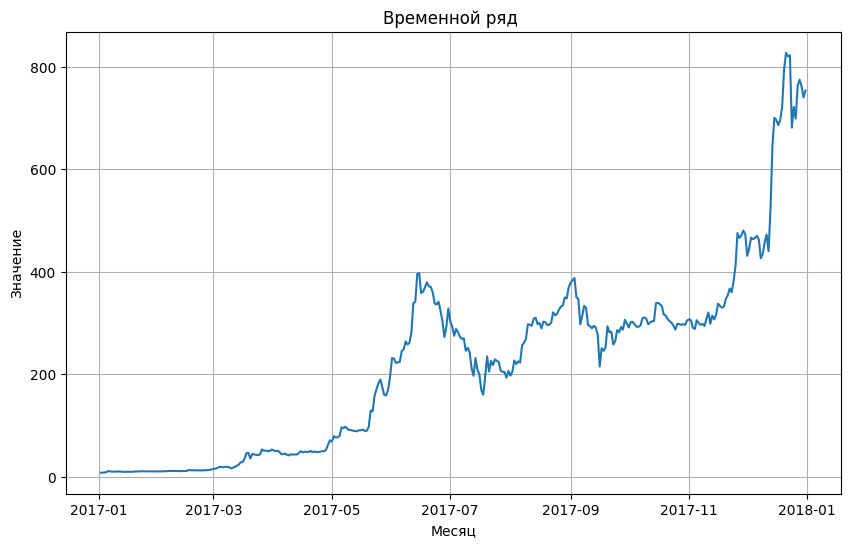

График сохранен: sample_data/outputs/series_time_.png


In [8]:
# Визуализируем временной ряд
visual.visual_series_time(dataset_period, '')

In [9]:
# Проверяем на стационарность (тест Дики-Фуллера)
analysis.dickey_fuller(dataset_period, 'Open')

ADF Statistic: 0.533155
p-value: 0.985847
	1%: -3.449
	5%: -2.870
	10%: -2.571
Open    float64
dtype: object


In [ ]:
# Нестационарный временной ряд
"""
Tест Дики-Фуллера показывает:
✓ ADF статистика: 0.533155. Значение положительное - признак нестационарности.
✓ p-значение: 0.985847. Значение значительно выше 0.05, не отвергает нулевую гипотезу о нестационарности ряда.
✓ Критические значения для разных уровней значимости ниже ADF, что также подтверждает нестационарность ряда.
"""

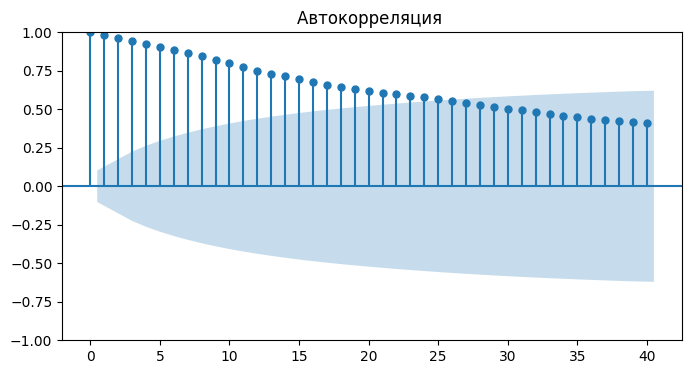

График сохранен: sample_data/outputs/autocorrelation_.png


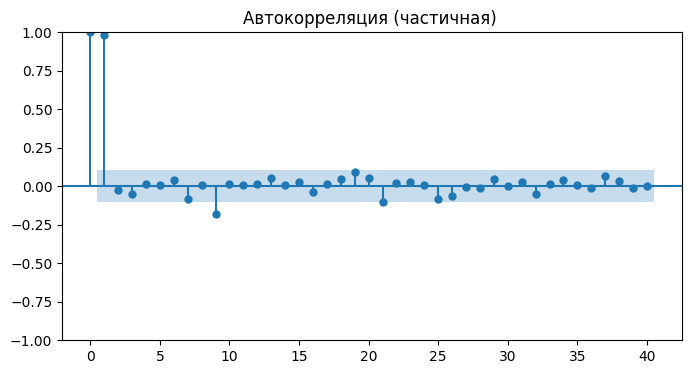

График сохранен: sample_data/outputs/autocorrelation_part_.png


In [10]:
# Автокорреляция
visual.visual_autocorrelation(dataset_period, '')

ADF Statistic: -6.601272
p-value: 0.000000
	1%: -3.449
	5%: -2.870
	10%: -2.571
Open    float64
dtype: object


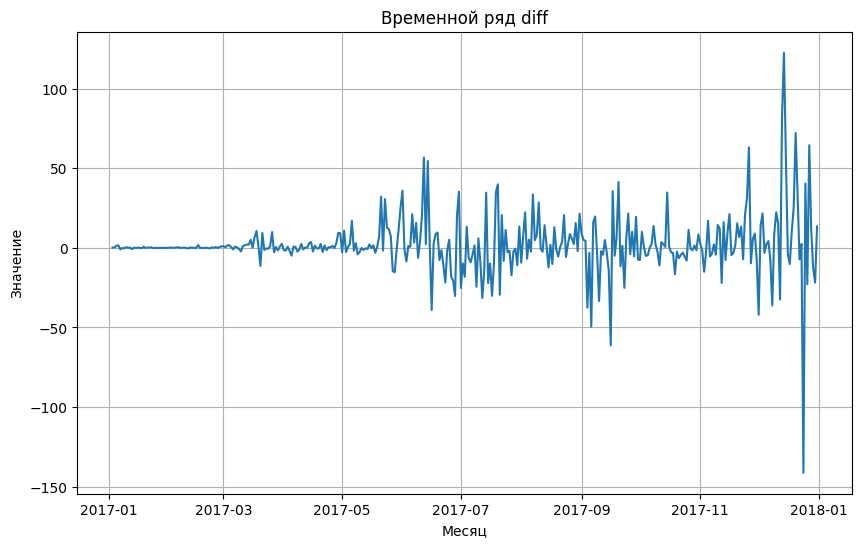

График сохранен: sample_data/outputs/series_time_diff.png


In [11]:
# Дифференцирование данных для достижения стационарности
data_diff = preproc.diff_data(dataset_period)

# Повторный тест ADF
analysis.dickey_fuller(data_diff, 'Open')

# Визуализация дифференцированных данных
visual.visual_series_time(data_diff, 'diff')


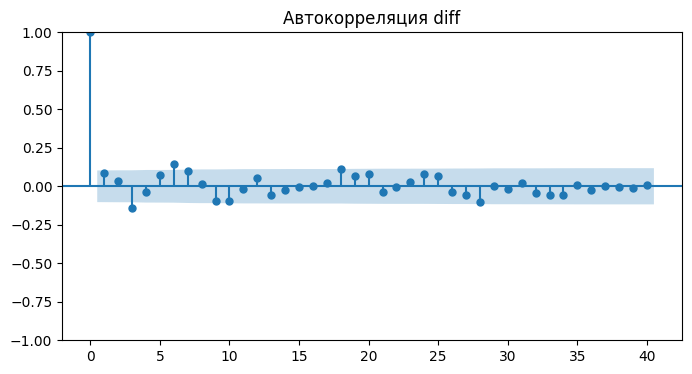

График сохранен: sample_data/outputs/autocorrelation_diff.png


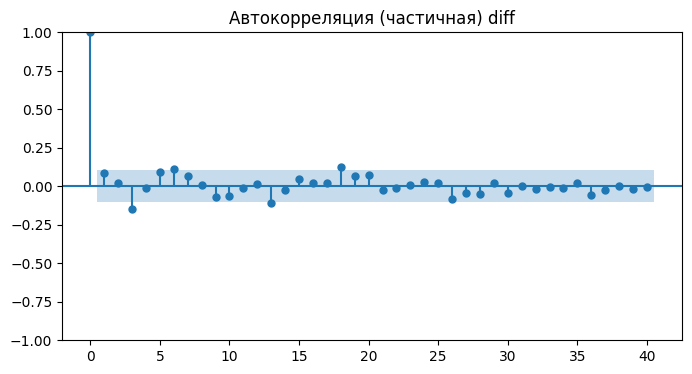

График сохранен: sample_data/outputs/autocorrelation_part_diff.png


In [12]:
# Визуализация автокорреляции
visual.visual_autocorrelation(data_diff, 'diff')

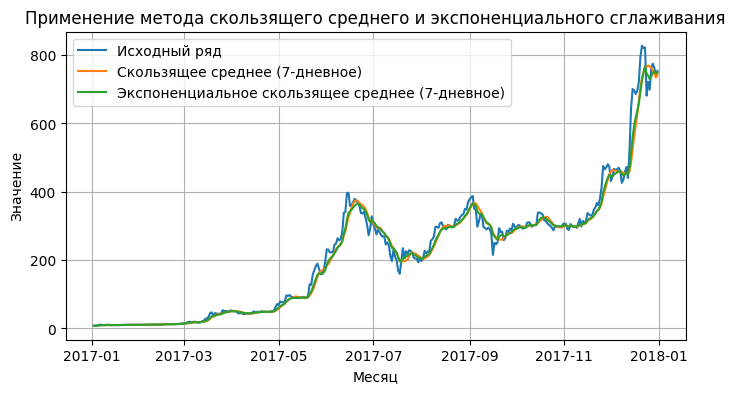

График сохранен: sample_data/outputs/amoving_average.png


In [13]:
# Метод скользящего среднего (Moving Average) и Экспоненциальное скользящее среднее (ema)
window_size = 7  # Размер окна
target = 'Open'
moving_average = dataset_period[target].rolling(window=window_size).mean() # Скользящее среднее
ema = dataset_period[target].ewm(span=window_size, adjust=False).mean() # Экспоненциальное скользящее среднее
analysis.moving_average(dataset_period, target, window_size, moving_average, ema)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2017-12-31 23:59:59    754.930100
2018-01-01 23:59:59    755.143435
2018-01-02 23:59:59    755.184249
2018-01-03 23:59:59    755.192057
2018-01-04 23:59:59    755.193551
2018-01-05 23:59:59    755.193837
2018-01-06 23:59:59    755.193892
2018-01-07 23:59:59    755.193902
2018-01-08 23:59:59    755.193904
2018-01-09 23:59:59    755.193905
Freq: D, Name: predicted_mean, dtype: float64


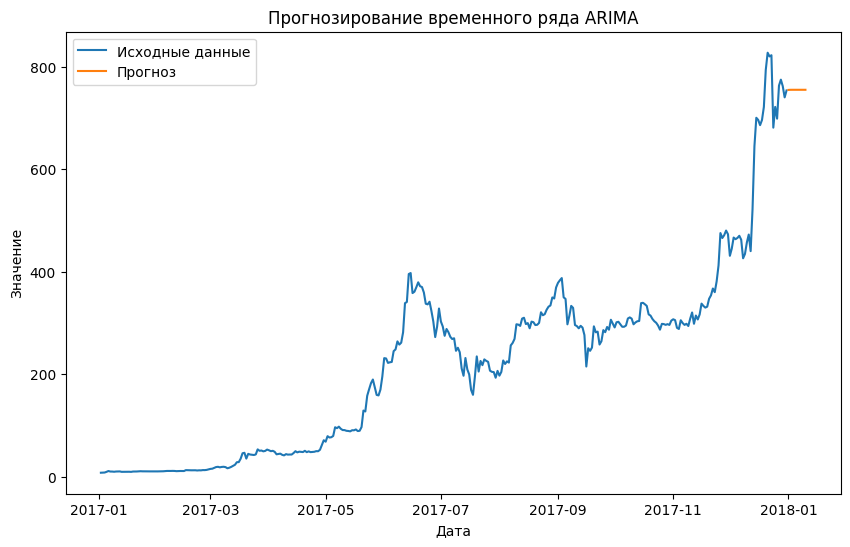

График сохранен: sample_data/outputs/prediction_ARIMA.png
Mean Absolute Error: 79.13608002764155
Mean Squared Error: 8192.709162716661


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# Обучение модели ARIMA
model = ARIMA(dataset_period, order=(1,1,1))
model_fit = model.fit()

# Прогнозирование
forecast = model_fit.forecast(steps=10)
print(forecast)

# Визуализация прогноза
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(dataset_period, label='Исходные данные')
plt.plot(forecast, label='Прогноз')
plt.title('Прогнозирование временного ряда ARIMA')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()
name_file = f'prediction_ARIMA.png'
visual.save_plot(fig, name_file)

# Оценка модели
data_train = dataset_period.iloc[:-10]
data_test = dataset_period.iloc[-10:]
model = ARIMA(data_train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
mse = mean_squared_error(data_test, forecast)
mae = mean_absolute_error(data_test, forecast)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2017-12-31 23:59:59    4.426046
2018-01-01 23:59:59    3.650126
2018-01-02 23:59:59    3.583231
2018-01-03 23:59:59    3.577463
2018-01-04 23:59:59    3.576966
2018-01-05 23:59:59    3.576923
2018-01-06 23:59:59    3.576920
2018-01-07 23:59:59    3.576919
2018-01-08 23:59:59    3.576919
2018-01-09 23:59:59    3.576919
Freq: D, Name: predicted_mean, dtype: float64


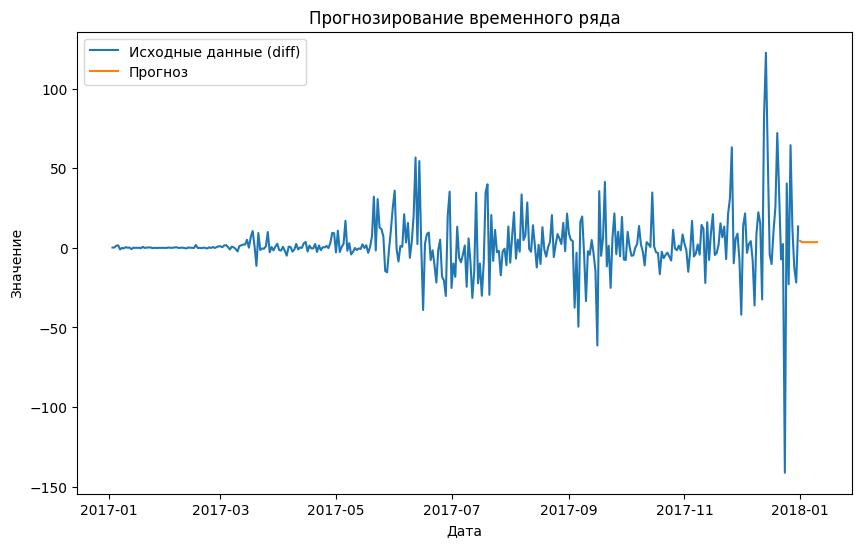

График сохранен: sample_data/outputs/prediction_ARIMA_diff.png
Mean Absolute Error: 37.86957523078286
Mean Squared Error: 3207.230613137946


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# Обучение модели ARIMA
model = ARIMA(data_diff, order=(1,1,1))
model_fit = model.fit()

# Прогнозирование
forecast = model_fit.forecast(steps=10)
print(forecast)

# Визуализация прогноза
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(data_diff, label='Исходные данные (diff)')
plt.plot(forecast, label='Прогноз')
plt.title('Прогнозирование временного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()
name_file = f'prediction_ARIMA_diff.png'
visual.save_plot(fig, name_file)

# Оценка модели
data_train = data_diff.iloc[:-10]
data_test = data_diff.iloc[-10:]
model = ARIMA(data_train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
mse = mean_squared_error(data_test, forecast)
mae = mean_absolute_error(data_test, forecast)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

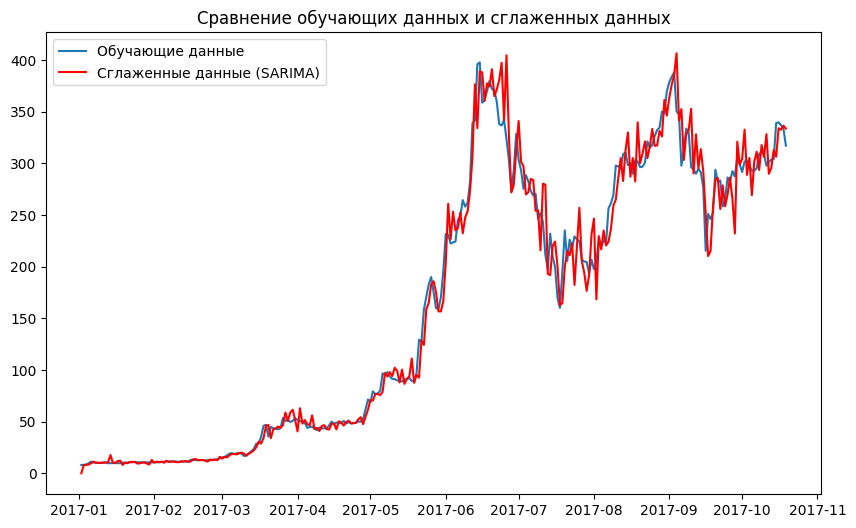

График сохранен: sample_data/outputs/visual_smoothed.png


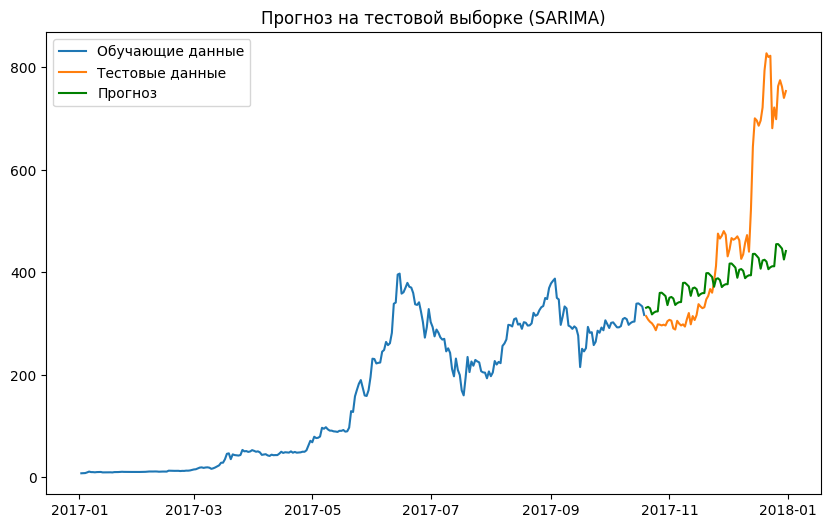

График сохранен: sample_data/outputs/visual_SARIMA.png
Mean Absolute Error (MAE): 114.613
Mean Squared Error (MSE): 26936.364
Root Mean Squared Error (RMSE): 164.123


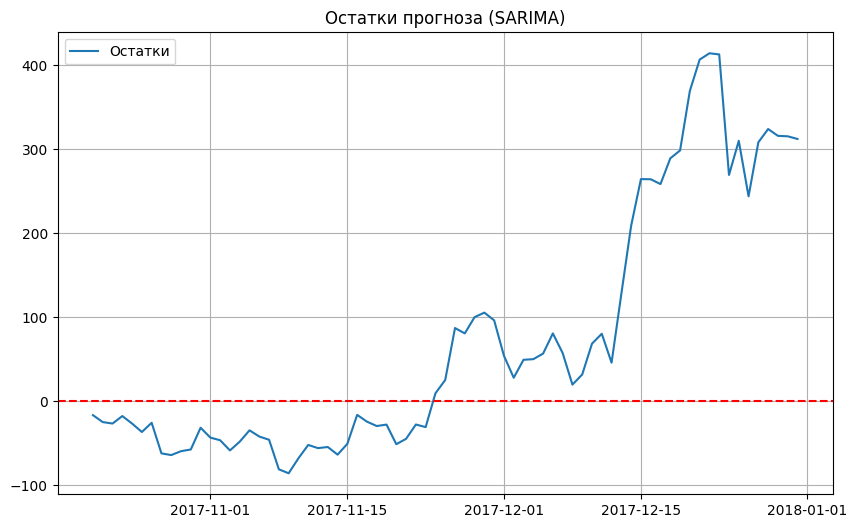

График сохранен: sample_data/outputs/visual_SARIMA_remainder.png


In [16]:
# Модели SARIMA (Seasonal ARIMA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Отключение предупреждений
warnings.filterwarnings("ignore")

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(dataset_period) * 0.8)
train_data, test_data = dataset_period[:train_size], dataset_period[train_size:]

# Построение модели SARIMA с произвольными параметрами
model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(0, 2, 1, 12))
model_fit = model.fit()

# Визуализация исходных данных и сглаженных данных с использованием модели SARIMA
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(train_data, label='Обучающие данные')
plt.plot(model_fit.fittedvalues, color='red', label='Сглаженные данные (SARIMA)')
plt.title('Сравнение обучающих данных и сглаженных данных')
plt.legend()
plt.show()
name_file = f'visual_smoothed.png'
visual.save_plot(fig, name_file)

# Прогнозирование для тестовой выборки
forecast_test = model_fit.forecast(steps=len(test_data))
# Визуализация прогноза на тестовой выборке
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Обучающие данные')
plt.plot(test_data.index, test_data, label='Тестовые данные')
plt.plot(test_data.index, forecast_test, color='green', label='Прогноз')
plt.title('Прогноз на тестовой выборке (SARIMA)')
plt.legend()
plt.show()
name_file = f'visual_SARIMA.png'
visual.save_plot(fig, name_file)

# Метрики качества
mae = mean_absolute_error(test_data, forecast_test)
mse = mean_squared_error(test_data, forecast_test)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

# Визуализация остатков
residuals = test_data['Open'] - forecast_test
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(residuals, label='Остатки')
plt.axhline(0, linestyle='--', color='red')
plt.title('Остатки прогноза (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()
name_file = f'visual_SARIMA_remainder.png'
visual.save_plot(fig, name_file)


In [10]:
# LSTM
!pip install tensorflow

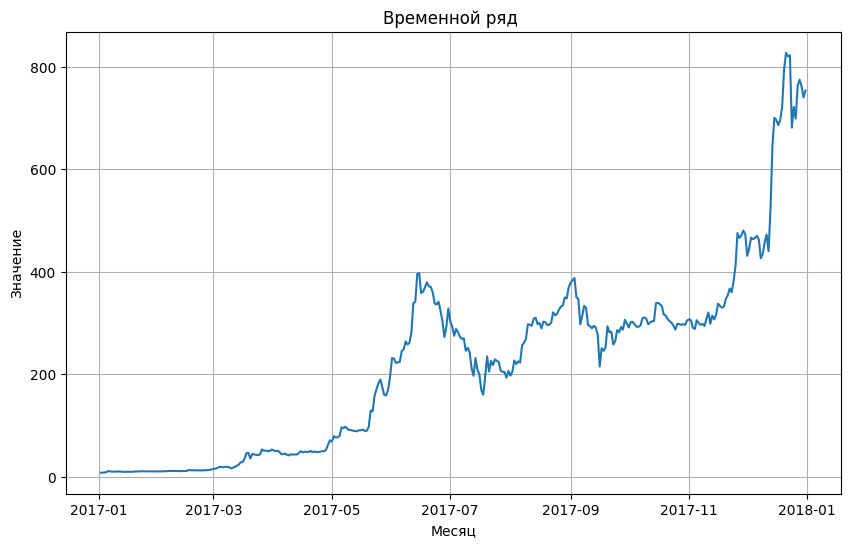

График сохранен: sample_data/outputs/series_time_.png


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Визуализиция данных
visual.visual_series_time(dataset_period, '')

In [18]:
# Подготовка данных для модели LSTM:
# Преобразование данных в массив NumPy
data_values = dataset_period['Open'].values.reshape(-1, 1)

# Нормализация данных [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_values)

# Разделим данные на обучающую и тестовую выборки
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [19]:
# Функция для создания последовательных данных для модели LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Определим длину последовательности и создадим последовательные данные
seq_length = 12
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Создание и обучение модели LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0678
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0380
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0205
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0068
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.5187e-04
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0011
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 8.0233e-04
Epoch 16/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


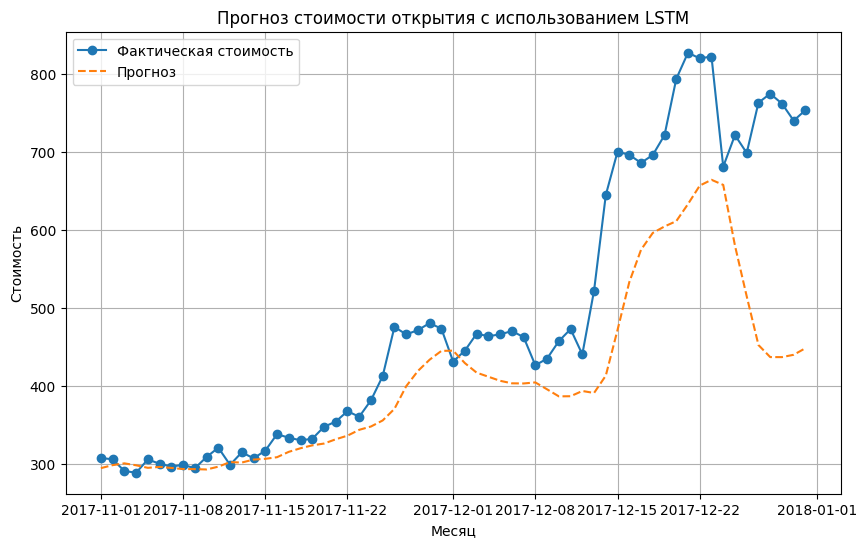

График сохранен: sample_data/outputs/visual_LSTM.png
Mean Absolute Error (MAE): 81.577
Mean Squared Error (MSE): 15226.345
Root Mean Squared Error (RMSE): 123.395


In [20]:
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Инверсия масштабирования, чтобы получить исходные значения
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Визуализируйте результаты прогноза
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(dataset_period.index[-len(y_test_inv):], y_test_inv, label='Фактическая стоимость', marker='o')
plt.plot(dataset_period.index[-len(y_test_inv):], y_pred_inv, label='Прогноз', linestyle='--')
plt.title("Прогноз стоимости открытия с использованием LSTM")
plt.xlabel("Месяц")
plt.ylabel("Стоимость")
plt.legend()
plt.grid(True)
plt.show()
name_file = f'visual_LSTM.png'
visual.save_plot(fig, name_file)

# Оценка точности прогноза
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

In [15]:
!pip install tensorflow

Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1485
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1431 
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1245
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


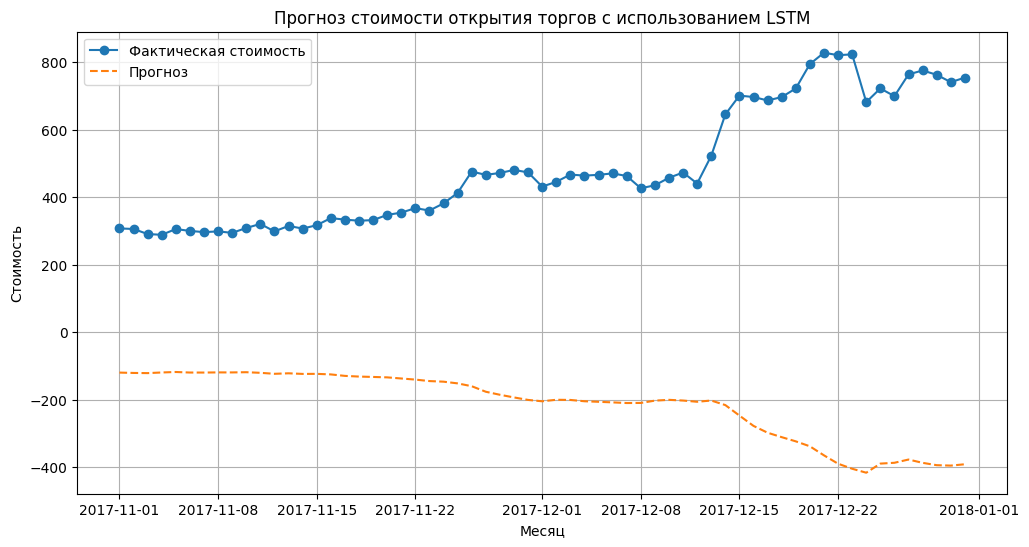

Mean Absolute Error (MAE): 701.392
Mean Squared Error (MSE): 566024.445
Root Mean Squared Error (RMSE): 752.346


In [21]:
# Глубокое обучение LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Используем только столбец Open
data_values = dataset_period['Open'].values.reshape(-1, 1)

# Нормализация данных [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_values)

# Разделим данные на обучающую и тестовую выборки
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Функция для создания последовательных данных для модели LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Определим длину последовательности и создим последовательные данные
seq_length = 12
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Создание и обучиние модель LSTM
model = Sequential()
model.add(LSTM(3, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=3, batch_size=128)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Инверсия масштабирования, чтобы получить исходные значения
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Визуализация результов прогноза
plt.figure(figsize=(12, 6))
plt.plot(dataset_period.index[-len(y_test_inv):], y_test_inv, label='Фактическая стоимость', marker='o')
plt.plot(dataset_period.index[-len(y_test_inv):], y_pred_inv, label='Прогноз', linestyle='--')
plt.title("Прогноз стоимости открытия торгов с использованием LSTM")
plt.xlabel("Месяц")
plt.ylabel("Стоимость")
plt.legend()
plt.grid(True)
plt.show()

# Оценка точности прогноза
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")



Epoch 1/10
233/233 - 6s - 28ms/step - loss: 0.0029
Epoch 2/10
233/233 - 2s - 10ms/step - loss: 0.0011
Epoch 3/10
233/233 - 2s - 8ms/step - loss: 8.8970e-04
Epoch 4/10
233/233 - 1s - 3ms/step - loss: 7.1617e-04
Epoch 5/10
233/233 - 1s - 6ms/step - loss: 6.6071e-04
Epoch 6/10
233/233 - 2s - 7ms/step - loss: 5.4136e-04
Epoch 7/10
233/233 - 2s - 9ms/step - loss: 5.8563e-04
Epoch 8/10
233/233 - 1s - 5ms/step - loss: 5.0326e-04
Epoch 9/10
233/233 - 1s - 6ms/step - loss: 5.2073e-04
Epoch 10/10
233/233 - 1s - 6ms/step - loss: 4.5671e-04
Epoch 1/10
233/233 - 2s - 11ms/step - loss: 0.0023
Epoch 2/10
233/233 - 1s - 6ms/step - loss: 6.4736e-04
Epoch 3/10
233/233 - 1s - 6ms/step - loss: 4.8906e-04
Epoch 4/10
233/233 - 1s - 6ms/step - loss: 4.7318e-04
Epoch 5/10
233/233 - 2s - 9ms/step - loss: 4.2098e-04
Epoch 6/10
233/233 - 1s - 3ms/step - loss: 3.6758e-04
Epoch 7/10
233/233 - 1s - 5ms/step - loss: 3.6858e-04
Epoch 8/10
233/233 - 1s - 6ms/step - loss: 3.8063e-04
Epoch 9/10
233/233 - 1s - 3ms/step -

1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


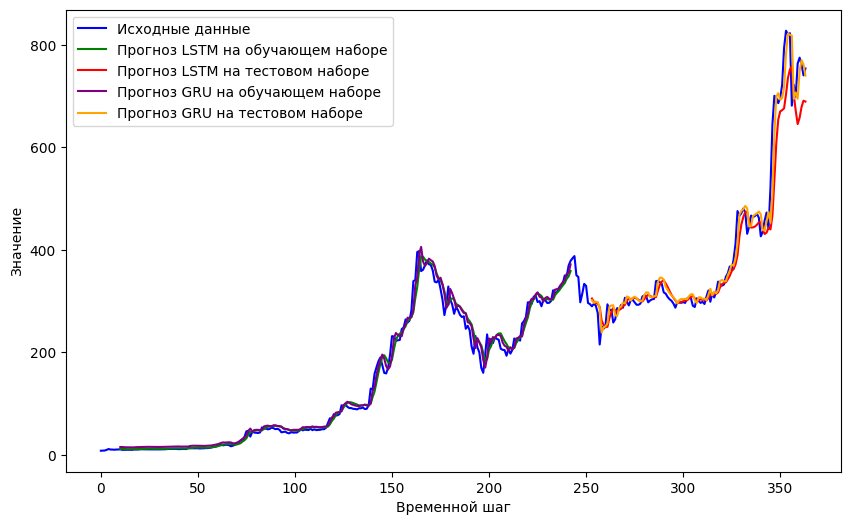

График сохранен: sample_data/outputs/visual_LSTM_GRU.png


In [22]:
# LSTM и GRU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense

# Используем только столбец Open
data_values = dataset_period['Open'].values.reshape(-1, 1)

# Нормализация данных [0, 1]
scaler = MinMaxScaler()
dataset = scaler.fit_transform(data_values)

# Разбиваем данные на обучающий и тестовый наборы
train_size = int(len(dataset) * 0.67)
train_data, test_data = dataset[:train_size], dataset[train_size:]

# Функция для создания датасета с последовательными данными
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

look_back = 10  # Количество предыдущих временных шагов для учитывания

# Подготовка данных в формате (количество примеров, количество временных шагов, количество признаков)
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Создаем модель LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(look_back, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель LSTM
model_lstm.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Создаем модель GRU
model_gru = Sequential()
model_gru.add(GRU(units=50, input_shape=(look_back, 1)))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель GRU
model_gru.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Делаем прогнозы с использованием обеих моделей
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

# Инвертируем масштабирование данных
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)

train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)

# Визуализируем прогнозы
train_plot_lstm = np.empty_like(dataset)
train_plot_lstm[:] = np.nan
train_plot_lstm[look_back:len(train_predict_lstm) + look_back, 0] = train_predict_lstm[:, 0]

test_plot_lstm = np.empty_like(dataset)
test_plot_lstm[:] = np.nan
offset = len(train_predict_lstm) + (look_back * 2)
test_plot_lstm[offset:len(test_predict_lstm) + offset, 0] = test_predict_lstm[:, 0]

train_plot_gru = np.empty_like(dataset)
train_plot_gru[:] = np.nan
train_plot_gru[look_back:len(train_predict_gru) + look_back, 0] = train_predict_gru[:, 0]

test_plot_gru = np.empty_like(dataset)
test_plot_gru[:] = np.nan
offset = len(train_predict_gru) + (look_back * 2)
test_plot_gru[offset:len(test_predict_gru) + offset, 0] = test_predict_gru[:, 0]

# Визуализируем результаты
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(scaler.inverse_transform(dataset), label='Исходные данные', color='blue')
plt.plot(train_plot_lstm, label='Прогноз LSTM на обучающем наборе', color='green')
plt.plot(test_plot_lstm, label='Прогноз LSTM на тестовом наборе', color='red')
plt.plot(train_plot_gru, label='Прогноз GRU на обучающем наборе', color='purple')
plt.plot(test_plot_gru, label='Прогноз GRU на тестовом наборе', color='orange')
plt.xlabel('Временной шаг')
plt.ylabel('Значение')
plt.legend()
plt.show()
name_file = f'visual_LSTM_GRU.png'
visual.save_plot(fig, name_file)
